In [1]:
import pandas as pd

from io import StringIO

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import ScalarFormatter

In [3]:
import matplotlib

In [4]:
matplotlib.rc('font', size=14)

In [5]:
orig_text = """
                                                       oof_accuracy                                                         test_accuracy                                                        
                                                               mean t_int_l t_int_h    std                           values          mean t_int_l t_int_h    std                           values
name                                                                                                                                                                                             
lgb_embeds: emb__hidden_size_bs_0064_hs_0032.pickle          0.5975  0.5909  0.6041 0.0048  [0.593 0.593 0.598 0.601 0.603]        0.6055  0.6011  0.6100 0.0032  [0.601 0.604 0.607 0.608 0.608]
lgb_embeds: emb__hidden_size_bs_0064_hs_0064.pickle          0.6087  0.6059  0.6115 0.0020  [0.606 0.608 0.609 0.609 0.611]        0.6107  0.6075  0.6139 0.0023  [0.607 0.611 0.611 0.611 0.613]
lgb_embeds: emb__hidden_size_bs_0064_hs_0096.pickle          0.6168  0.6103  0.6233 0.0047  [0.609 0.616 0.619 0.619 0.621]        0.6181  0.6109  0.6252 0.0052  [0.612 0.615 0.618 0.619 0.626]
lgb_embeds: emb__hidden_size_bs_0064_hs_0160.pickle          0.6220  0.6152  0.6289 0.0049  [0.617 0.618 0.621 0.626 0.628]        0.6302  0.6247  0.6357 0.0039  [0.624 0.629 0.632 0.632 0.634]
lgb_embeds: emb__hidden_size_bs_0064_hs_0224.pickle          0.6290  0.6251  0.6328 0.0028  [0.626 0.627 0.628 0.630 0.633]        0.6289  0.6248  0.6329 0.0029  [0.625 0.627 0.630 0.631 0.632]
lgb_embeds: emb__hidden_size_bs_0064_hs_0480.pickle          0.6343  0.6297  0.6389 0.0033  [0.630 0.632 0.635 0.636 0.639]        0.6335  0.6291  0.6379 0.0032  [0.631 0.631 0.631 0.637 0.637]
lgb_embeds: emb__hidden_size_bs_0064_hs_0800.pickle          0.6369  0.6305  0.6433 0.0046  [0.631 0.633 0.639 0.641 0.641]        0.6386  0.6324  0.6448 0.0044  [0.633 0.634 0.641 0.641 0.643]
lgb_embeds: emb__hidden_size_bs_0064_hs_1200.pickle          0.6366  0.6313  0.6419 0.0038  [0.631 0.636 0.636 0.638 0.641]        0.6378  0.6328  0.6428 0.0036  [0.634 0.634 0.638 0.641 0.642]
lgb_embeds: emb__hidden_size_bs_0064_hs_1600.pickle          0.6268  0.6179  0.6358 0.0064  [0.619 0.624 0.626 0.631 0.635]        0.6196  0.6164  0.6228 0.0023  [0.618 0.618 0.619 0.619 0.624]
linear_embeds: emb__hidden_size_bs_0064_hs_0032.pickle       0.5830  0.5748  0.5913 0.0060  [0.576 0.581 0.582 0.583 0.593]        0.5843  0.5808  0.5879 0.0025  [0.581 0.582 0.585 0.586 0.588]
linear_embeds: emb__hidden_size_bs_0064_hs_0064.pickle       0.5980  0.5957  0.6003 0.0017  [0.596 0.597 0.598 0.599 0.601]        0.6037  0.6020  0.6053 0.0012  [0.602 0.603 0.604 0.604 0.605]
linear_embeds: emb__hidden_size_bs_0064_hs_0096.pickle       0.6090  0.6040  0.6139 0.0036  [0.605 0.606 0.609 0.612 0.613]        0.6095  0.6066  0.6124 0.0021  [0.607 0.609 0.609 0.609 0.613]
linear_embeds: emb__hidden_size_bs_0064_hs_0160.pickle       0.6179  0.6123  0.6236 0.0041  [0.613 0.616 0.616 0.621 0.623]        0.6198  0.6170  0.6226 0.0020  [0.618 0.618 0.621 0.621 0.622]
linear_embeds: emb__hidden_size_bs_0064_hs_0224.pickle       0.6163  0.6114  0.6212 0.0035  [0.613 0.613 0.617 0.617 0.621]        0.6174  0.6130  0.6218 0.0032  [0.614 0.616 0.617 0.618 0.622]
linear_embeds: emb__hidden_size_bs_0064_hs_0480.pickle       0.6263  0.6198  0.6328 0.0047  [0.620 0.624 0.625 0.631 0.631]        0.6209  0.6156  0.6261 0.0038  [0.618 0.618 0.620 0.621 0.627]
linear_embeds: emb__hidden_size_bs_0064_hs_0800.pickle       0.6280  0.6241  0.6319 0.0028  [0.625 0.626 0.627 0.631 0.631]        0.6183  0.6161  0.6205 0.0016  [0.617 0.617 0.618 0.619 0.621]
linear_embeds: emb__hidden_size_bs_0064_hs_1200.pickle       0.6257  0.6179  0.6334 0.0056  [0.619 0.621 0.627 0.629 0.632]        0.6211  0.6172  0.6250 0.0028  [0.618 0.619 0.622 0.623 0.624]
linear_embeds: emb__hidden_size_bs_0064_hs_1600.pickle       0.6077  0.6008  0.6145 0.0049  [0.602 0.604 0.608 0.611 0.614]        0.6074  0.6040  0.6108 0.0025  [0.605 0.607 0.607 0.608 0.611]
xgb_embeds: emb__hidden_size_bs_0064_hs_0032.pickle          0.5936  0.5832  0.6040 0.0075  [0.585 0.591 0.593 0.595 0.605]        0.5949  0.5892  0.6006 0.0041  [0.589 0.594 0.596 0.596 0.600]
xgb_embeds: emb__hidden_size_bs_0064_hs_0064.pickle          0.5997  0.5897  0.6097 0.0072  [0.588 0.599 0.601 0.605 0.606]        0.6017  0.5947  0.6088 0.0051  [0.596 0.598 0.602 0.603 0.609]
xgb_embeds: emb__hidden_size_bs_0064_hs_0096.pickle          0.6094  0.6037  0.6152 0.0042  [0.605 0.606 0.608 0.614 0.614]        0.6034  0.5945  0.6123 0.0064  [0.599 0.599 0.601 0.604 0.614]
xgb_embeds: emb__hidden_size_bs_0064_hs_0160.pickle          0.6151  0.6071  0.6231 0.0058  [0.610 0.611 0.614 0.617 0.624]        0.6197  0.6130  0.6264 0.0048  [0.613 0.617 0.621 0.621 0.626]
xgb_embeds: emb__hidden_size_bs_0064_hs_0224.pickle          0.6218  0.6185  0.6252 0.0024  [0.620 0.620 0.621 0.622 0.626]        0.6191  0.6107  0.6274 0.0060  [0.610 0.617 0.619 0.622 0.627]
xgb_embeds: emb__hidden_size_bs_0064_hs_0480.pickle          0.6265  0.6170  0.6359 0.0068  [0.616 0.623 0.630 0.631 0.631]        0.6263  0.6196  0.6331 0.0049  [0.619 0.625 0.628 0.628 0.632]
xgb_embeds: emb__hidden_size_bs_0064_hs_0800.pickle          0.6316  0.6261  0.6370 0.0040  [0.627 0.629 0.632 0.634 0.637]        0.6270  0.6249  0.6291 0.0015  [0.625 0.627 0.627 0.627 0.629]
xgb_embeds: emb__hidden_size_bs_0064_hs_1200.pickle          0.6294  0.6243  0.6346 0.0037  [0.624 0.629 0.631 0.631 0.634]        0.6257  0.6216  0.6299 0.0030  [0.623 0.623 0.625 0.628 0.630]
xgb_embeds: emb__hidden_size_bs_0064_hs_1600.pickle          0.6142  0.6059  0.6225 0.0060  [0.607 0.611 0.612 0.619 0.622]        0.6153  0.6121  0.6186 0.0023  [0.613 0.614 0.614 0.616 0.619]
"""

In [6]:
col_stats = ['mean', 't_int_l', 't_int_h', 'std'] + [f'{i}' for i in range(5)]

In [7]:
df = pd.read_fwf(StringIO(orig_text)).iloc[3:]
df.columns = ['name'] + [f'{k}.{n}' for k in ['valid', 'test'] for n in col_stats]

In [8]:
df = pd.concat([
    df['name'].str.extract(
        r'(?P<model_type>\w+): emb__hidden_size_bs_(?P<batch_size>\d+)_hs_(?P<hidden_size>\d+)\.pickle'),
    df
], axis=1)

In [9]:
for col, dt in df.dtypes.iteritems():
    if col in ('name', 'model_type'):
        continue
    if dt == 'float':
        continue
    df[col] = pd.to_numeric(df[col].str.strip('[').str.strip(']'))

In [10]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: lightyellow' if v else '' for v in is_max]

def highlight_values(v):
    return 'background-color: lightyellow' if not pd.isna(v) else ''

In [11]:
df.pivot_table(index=['batch_size', 'hidden_size'], columns='model_type', values='valid.mean') \
    .style.apply(highlight_max, axis=1)

In [12]:
df.pivot_table(index='hidden_size', columns='batch_size', values='valid.mean', aggfunc='mean').round(3) \
    .style.applymap(highlight_values)

batch_size,64
hidden_size,
32,0.591
64,0.602
96,0.612
160,0.618
224,0.622
480,0.629
800,0.632
1200,0.631
1600,0.616


In [13]:
df2 = pd.melt(
    df,
    id_vars=['model_type', 'batch_size', 'hidden_size', 'name'],
    var_name='fold_n',
    value_vars=[f'valid.{i}' for i in range(5)],
    value_name='Valid accuracy',
)

In [14]:
df2

,model_type,batch_size,hidden_size,name,fold_n,Valid accuracy
0,lgb_embeds,64,32,lgb_embeds: emb__hidden_size_bs_0064_hs_0032.p...,valid.0,0.593
1,lgb_embeds,64,64,lgb_embeds: emb__hidden_size_bs_0064_hs_0064.p...,valid.0,0.606
2,lgb_embeds,64,96,lgb_embeds: emb__hidden_size_bs_0064_hs_0096.p...,valid.0,0.609
3,lgb_embeds,64,160,lgb_embeds: emb__hidden_size_bs_0064_hs_0160.p...,valid.0,0.617
4,lgb_embeds,64,224,lgb_embeds: emb__hidden_size_bs_0064_hs_0224.p...,valid.0,0.626
...,...,...,...,...,...,...
130,xgb_embeds,64,224,xgb_embeds: emb__hidden_size_bs_0064_hs_0224.p...,valid.4,0.626
131,xgb_embeds,64,480,xgb_embeds: emb__hidden_size_bs_0064_hs_0480.p...,valid.4,0.631
132,xgb_embeds,64,800,xgb_embeds: emb__hidden_size_bs_0064_hs_0800.p...,valid.4,0.637
133,xgb_embeds,64,1200,xgb_embeds: emb__hidden_size_bs_0064_hs_1200.p...,valid.4,0.634


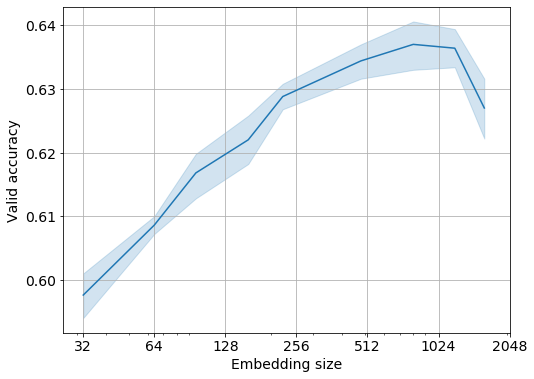

In [22]:
plt.figure(figsize=(8, 6))
ax = sns.lineplot(
    x='Embedding size',
    y='Valid accuracy',
    palette='tab10',
    data=df2[lambda x: x['model_type'].eq('lgb_embeds')]
    [lambda x: x['batch_size'].isin((64,))]
    .rename(columns={'hidden_size': 'Embedding size'}),
    ci=95,
)
# plt.title('Age prediction task')
ax.set_xscale('log'),
ax.set_xticks([2 ** i for i in range(5, 12)])
ax.get_xaxis().set_major_formatter(ScalarFormatter())

# plt.axhline(df['valid.mean'].quantile(0.99), color='black', linestyle='--', linewidth=1)
# plt.axhspan(0.6285, 0.6387, alpha=0.1, color='black')
plt.grid()
# plt.legend(loc='lower right')
# plt.show()

plt.savefig('age-pred-hidden-size.pdf')